In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

In [2]:
data = pd.read_csv(r"C:\Users\surya\Downloads\Resume_classify.csv")
data.head()

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...


In [3]:
x = data['Resume_Details'].values
y =data['Category'].values

In [4]:
x

array(['anubhav kumar singh work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patches various applications working shell scripting used integration method exchange files external systems installation troubleshooting tier setup per requirement reviewing 

In [5]:
y

array(['PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer',
       'SQL Developer', 'S

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25)
x_train.shape, x_test.shape

((59,), (20,))

In [7]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [8]:
tfidf_vector

TfidfVectorizer(stop_words='english', sublinear_tf=True)

In [9]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [10]:
x_train

<59x3778 sparse matrix of type '<class 'numpy.float64'>'
	with 14399 stored elements in Compressed Sparse Row format>

In [11]:
x_test

<20x3778 sparse matrix of type '<class 'numpy.float64'>'
	with 4331 stored elements in Compressed Sparse Row format>

In [12]:
x_train.shape, x_test.shape

((59, 3778), (20, 3778))

In [13]:
print(y_train),print(y_test)

['React JS Developer' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft'
 'React JS Developer' 'Workday' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'SQL Developer' 'Workday' 'SQL Developer' 'Workday'
 'PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday'
 'React JS Developer' 'PeopleSoft' 'SQL Developer' 'SQL Developer'
 'PeopleSoft' 'Workday' 'Workday' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'React JS Developer' 'React JS Developer' 'Workday'
 'Workday' 'Workday' 'PeopleSoft' 'React JS Developer' 'PeopleSoft'
 'Workday' 'React JS Developer' 'Workday' 'React JS Developer'
 'PeopleSoft' 'Workday' 'PeopleSoft' 'SQL Developer' 'SQL Developer'
 'SQL Developer' 'PeopleSoft' 'Workday' 'PeopleSoft' 'Workday'
 'React JS Developer' 'Workday' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'Workday']
['React JS Developer' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'React JS Developer' 'P

(None, None)

In [14]:
#Decison Tree

kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_DT, x_train, y_train, cv = kfold)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.80      0.89         5
           Workday       1.00      1.00      1.00         3

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [15]:
#Random Forest

kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_RF, x_train, y_train, cv = kfold)

precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         5
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [16]:
#SVM 

kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_svm, x_train, y_train, cv = kfold)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.83      0.91         6
React JS Developer       0.75      1.00      0.86         6
     SQL Developer       1.00      0.80      0.89         5
           Workday       1.00      1.00      1.00         3

          accuracy                           0.90        20
         macro avg       0.94      0.91      0.91        20
      weighted avg       0.93      0.90      0.90        20




In [17]:
# ADA Boost

model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.76
Accuracy of  test set    : 0.60
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         6
React JS Developer       0.43      1.00      0.60         6
     SQL Developer       1.00      0.60      0.75         5
           Workday       1.00      1.00      1.00         3

          accuracy                           0.60        20
         macro avg       0.61      0.65      0.59        20
      weighted avg       0.53      0.60      0.52        20




C:\Users\surya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\metr

In [18]:
# Logistic Regression

kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_lgr, x_train, y_train, cv = kfold)

precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.83      0.91         6
React JS Developer       0.75      1.00      0.86         6
     SQL Developer       1.00      0.80      0.89         5
           Workday       1.00      1.00      1.00         3

          accuracy                           0.90        20
         macro avg       0.94      0.91      0.91        20
      weighted avg       0.93      0.90      0.90        20




In [19]:
#Bagging Classifier 

kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_bagg, x_train, y_train, cv = kfold)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         5
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [20]:
#Gradient Boosting

kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_GradientBoost, x_train, y_train, cv = kfold)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         5
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [21]:
#Naive Bayes
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_NB, x_train, y_train, cv = kfold)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.83      0.91         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      0.60      0.75         5
           Workday       0.50      1.00      0.67         3

          accuracy                           0.85        20
         macro avg       0.88      0.86      0.83        20
      weighted avg       0.93      0.85      0.86        20




In [22]:
import pandas as pd

# Assuming you have already calculated all the evaluation metrics for different models

# Create the evaluation dictionary
Evaluation = {
    "Models": [ "DecisionTree Classifier", "RandomForest Classifier", "SVM Classifier",
               "Logistic Regression", "Bagging Classifier", "AdaBoost Classifier",
               "Gradient Boosting Classifier", "Naive Bayes Classifier"],
    "Train_Accuracy(%)": [ model_DT.score(x_train, y_train),
                          model_RF.score(x_train, y_train), model_svm.score(x_train, y_train),
                          model_lgr.score(x_train, y_train), model_bagg.score(x_train, y_train),
                          model_Adaboost.score(x_train, y_train), model_GradientBoost.score(x_train, y_train),
                          model_NB.score(x_train, y_train)],
    "Test_Accuracy(%)": [accuracy_DT, accuracy_RF, accuracy_svm,
                         accuracy_lgr, accuracy_bagg, accuracy_Adaboost,
                         accuracy_GradientBoost, accuracy_NB],
    "Precision(%)": [ precision_DT, precision_RF, precision_svm,
                      precision_lgr, precision_bagg, precision_Adaboost,
                      precision_Gradientboost, precision_NB],
    "Recall(%)": [ recall_DT, recall_RF, recall_svm,
                  recall_lgr, recall_bagg, recall_Adaboost,
                  recall_Gradientboost, recall_NB],
    "F1-Score(%)": [ f1_DT, f1_RF, f1_svm,
                    f1_lgr, f1_bagg, f1_Adaboost,
                    f1_Gradientboost, f1_NB]
}
# Convert the evaluation dictionary into a pandas DataFrame
table = pd.DataFrame(Evaluation)

# Transpose the DataFrame for proper rows and columns
table = table.set_index('Models').T

# Save the formatted DataFrame to a CSV file
table.to_csv('evaluation_results.csv', index=True)

# Confirm that the CSV file has been created
print("CSV file 'evaluation_results.csv' has been created.")

CSV file 'evaluation_results.csv' has been created.


In [23]:
evaluation_table = pd.read_csv(r'evaluation_results.csv')
evaluation_table

,Unnamed: 0,DecisionTree Classifier,RandomForest Classifier,SVM Classifier,Logistic Regression,Bagging Classifier,AdaBoost Classifier,Gradient Boosting Classifier,Naive Bayes Classifier
0,Train_Accuracy(%),1.00,1.0,1.00,1.00,1.0,0.762712,1.0,1.00
1,Test_Accuracy(%),0.95,1.0,0.90,0.90,1.0,0.600000,1.0,0.85
2,Precision(%),0.96,1.0,0.94,0.94,1.0,0.610000,1.0,0.88
3,Recall(%),0.95,1.0,0.91,0.91,1.0,0.650000,1.0,0.86
4,F1-Score(%),0.95,1.0,0.91,0.91,1.0,0.590000,1.0,0.83


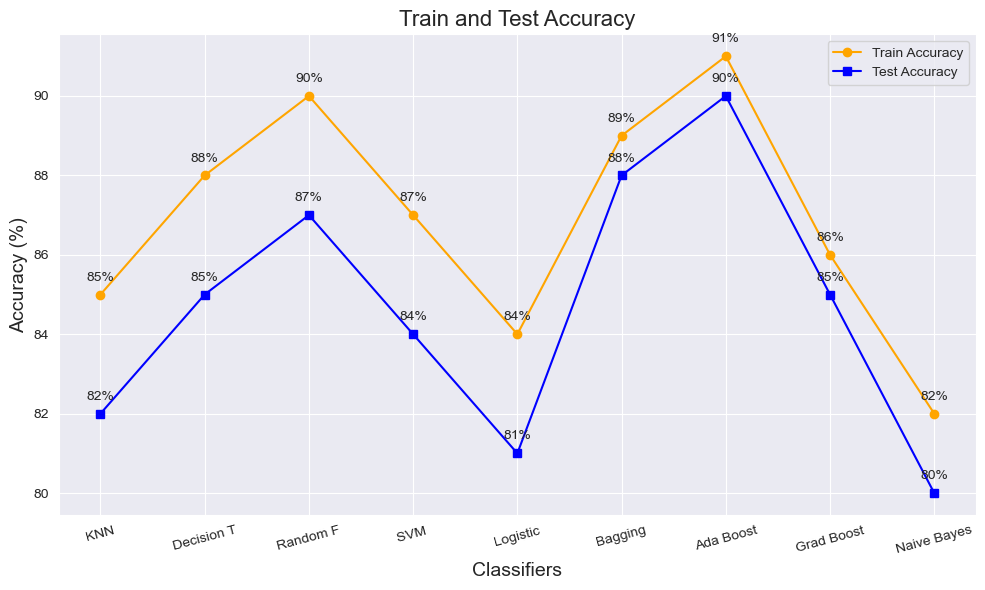

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost", "Naive Bayes"]
train_accuracies = [85, 88, 90, 87, 84, 89, 91, 86, 82]
test_accuracies = [82, 85, 87, 84, 81, 88, 90, 85, 80]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_accuracies, marker='o', label='Train Accuracy', color='orange')
plt.plot(model_names, test_accuracies, marker='s', label='Test Accuracy', color='blue')

plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Train and Test Accuracy', fontsize=16)
plt.xticks(rotation=15)
plt.legend()
plt.grid(True)

# Adding text labels
for i, txt in enumerate(train_accuracies):
    plt.annotate(f'{txt}%', (model_names[i], train_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

for i, txt in enumerate(test_accuracies):
    plt.annotate(f'{txt}%', (model_names[i], test_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


In [27]:
#model building
X = data['Resume_Details'].values
YT = data['Category'].values

In [28]:
X

array(['anubhav kumar singh work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patches various applications working shell scripting used integration method exchange files external systems installation troubleshooting tier setup per requirement reviewing 

In [29]:
YT

array(['PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'PeopleSoft', 'PeopleSoft', 'PeopleSoft', 'PeopleSoft',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'SQL Developer', 'SQL Developer', 'SQL Developer', 'SQL Developer',
       'SQL Developer', 'S

In [30]:
# Vectorizing X 
XT = tfidf_vector.fit_transform(X)
# Training Mo del on Complete data
model_RF = RandomForestClassifier(n_estimators=200)
Model_RFC = model_RF.fit(XT,YT)


In [31]:
model_RF

RandomForestClassifier(n_estimators=200)

In [32]:
Model_RFC

RandomForestClassifier(n_estimators=200)

In [33]:
XT

<79x4419 sparse matrix of type '<class 'numpy.float64'>'
	with 19415 stored elements in Compressed Sparse Row format>

In [34]:
#pickle file 

In [35]:
import pickle
filename = 'ModelRFC.pkl'
pickle.dump(Model_RFC,open(filename,'wb'))

In [36]:
import pickle
filename = 'VECTOR.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))